# Lab 1

In [1]:
from scipy import special as sps
prob = sps.comb(39,5,exact = True) #總組合數

#頭獎
prob1 = sps.comb(5,5,exact = True)
prob2 = sps.comb(34,0,exact = True)
l1 = round(((prob1*prob2)/prob)*1000000,2)

#二等獎
prob3 = sps.comb(5,4,exact = True)
prob4 = sps.comb(34,1,exact = True)
l2 = round(((prob3*prob4)/prob)*100,6)

#三等獎
prob5 = sps.comb(5,3,exact = True)
prob6 = sps.comb(34,2,exact = True)
l3 = round(((prob5*prob6)/prob)*100,6)

#四等獎
prob7 = sps.comb(5,2,exact = True)
prob8 = sps.comb(34,3,exact = True)
l4 = round(((prob7*prob8)/prob)*100,6)

import pandas as pd
data = {'種類':['頭獎','二等獎','三等獎','四等獎'],
       '機率值':[l1,l2,l3,l4]}
pd.DataFrame(data,index = range(1,5),columns = ['種類','機率值'])

,種類,機率值
1,頭獎,1.740000
2,二等獎,0.029526
3,三等獎,0.974369
4,四等獎,10.393274


# Lab2

In [2]:
#每一獎的組數
prob1*prob2 , prob3*prob4  , prob5*prob6  , prob7*prob8 
total_comb = sps.comb(39,5,exact = True)
total_comb

575757

In [3]:
#每一個獎的組數總和除以總組合數
avr_numb = (8000000*prob1*prob2 + 20000*prob3*prob4 + 300*prob5*prob6 + 50*prob7*prob8)/total_comb
avr_numb

27.919764761870024

In [4]:
#平均報酬率
print('今彩539平均報酬率:{}'.format(((avr_numb-50)/50)*100))

今彩539平均報酬率:-44.16047047625995


# 假設檢定

In [7]:
import pandas as pd
df = pd.read_csv('./president_heights.csv')
df.head(10)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [17]:
df.tail(10)

,order,name,height(cm)
32,35,John F. Kennedy,183
33,36,Lyndon B. Johnson,193
34,37,Richard Nixon,182
35,38,Gerald Ford,183
36,39,Jimmy Carter,177
37,40,Ronald Reagan,185
38,41,George H. W. Bush,188
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [24]:
df2 = df.tail(10)[['height(cm)']]

In [25]:
df1 = df.iloc[0:len(df)-10][['height(cm)']]
len(df1)

32

In [26]:
len(df)

42

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

# 雙樣本檢定

In [30]:
t,p = stats.ttest_ind(df2,df1)#two tailed data
p1 = '%f'%(p/2)#divide into 2
print('t-statistics:'+str(t))
print('p-value:'+str(p1))

t-statistics:[2.69562114]
p-value:0.005113


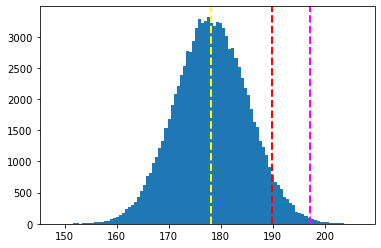

In [31]:
pop = np.random.normal(df1.mean(), df1.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, df1.mean(), df1.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()